In [132]:
import requests
import pandas as pd

url = "http://datos.gob.es/apidata/catalog/dataset"
response = requests.get(url)

In [133]:
url = "http://datos.gob.es/apidata/catalog/dataset/01002.px.json"

In [134]:
response = requests.get(url)


In [135]:
if response.status_code == 200:
    print("Conexión exitosa")
else:
    print(f"Error al conectarse: {response.status_code}")

Conexión exitosa


In [136]:
data = response.json()

In [137]:
data

{'format': 'linked-data-api',
 'version': '0.2',
 'result': {'_about': 'http://datos.gob.es/apidata/catalog/dataset/01002.px.json',
  'definition': 'http://datos.gob.es/apidata/catalog/meta/dataset/_id.json',
  'extendedMetadataVersion': 'http://datos.gob.es/apidata/catalog/dataset/01002.px.json?_metadata=all',
  'first': 'http://datos.gob.es/apidata/catalog/dataset/01002.px.json?_page=0',
  'hasPart': 'http://datos.gob.es/apidata/catalog/dataset/01002.px.json',
  'isPartOf': 'http://datos.gob.es/apidata/catalog/dataset/01002.px.json',
  'items': [],
  'itemsPerPage': 10,
  'page': 0,
  'startIndex': 1,
  'type': ['http://purl.org/linked-data/api/vocab#ListEndpoint',
   'http://purl.org/linked-data/api/vocab#Page']}}

In [138]:
import locale
locale.setlocale(locale.LC_TIME, "es_ES.UTF-8")  # Asegúrate de que tu sistema soporte "es_ES.UTF-8"


'es_ES.UTF-8'

In [139]:
df = pd.read_csv("72028.csv", sep=";")

In [140]:
df["Total"] = df["Total"].astype(str).str.replace('.', '').astype(int)


In [141]:
df = df.loc[(df["Mes de fallecimiento"] != "Todos los meses") & (df["Sexo"] != "Ambos sexos") & (df["Causas (lista reducida)"] != "001-102 I-XXII.Todas las causas")]

In [142]:


df["#_mes_de_fallecimiento"] = pd.to_datetime(df["Mes de fallecimiento"], format="%B", errors="coerce").dt.month

In [143]:
df = df.sort_values("#_mes_de_fallecimiento")

In [144]:
df

,Causas (lista reducida),Sexo,Mes de fallecimiento,Total,#_mes_de_fallecimiento
53,001-008 I.Enfermedades infecciosas y parasitarias,Hombres,enero,8480,1
1613,"036 Tumores malignos del tejido linfático, de ...",Hombres,enero,2430,1
4161,090-102 XX.Causas externas de mortalidad,Mujeres,enero,5980,1
3056,067 Otras enfermedades del sistema respiratorio,Hombres,enero,1097,1
2952,064 Enfermedades crónicas de las vías respirat...,Mujeres,enero,4450,1
...,...,...,...,...,...
2794,061 Otras enfermedades de los vasos sanguíneos,Hombres,diciembre,3070,12
2768,060 Aterosclerosis,Mujeres,diciembre,580,12
2755,060 Aterosclerosis,Hombres,diciembre,400,12
2963,064 Enfermedades crónicas de las vías respirat...,Mujeres,diciembre,3490,12


In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



<Axes: xlabel='Sexo', ylabel='count'>

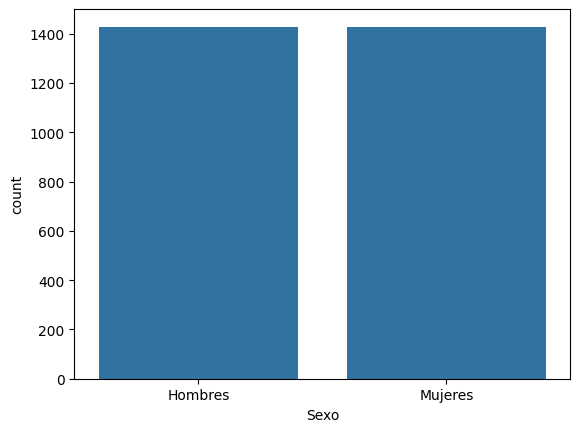

In [146]:
sns.countplot(x=df.Sexo)

<Axes: xlabel='Total', ylabel='Count'>

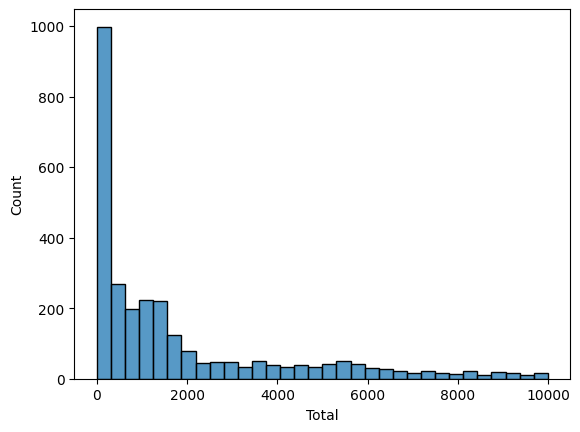

In [147]:
sns.histplot(x=df.Total)

<Axes: xlabel='Total', ylabel='Count'>

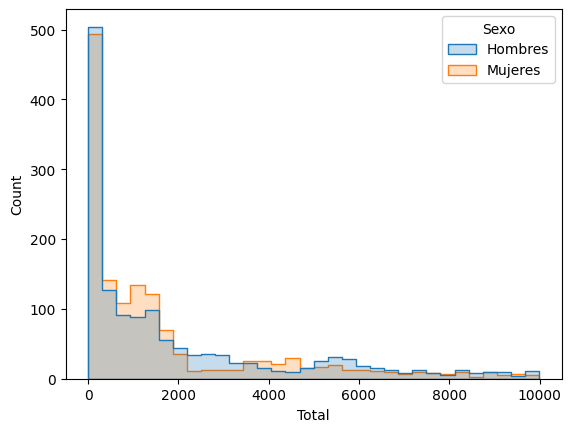

In [148]:
sns.histplot(x=df.Total,
             hue=df.Sexo,
             element="step")

<Axes: xlabel='Total', ylabel='Count'>

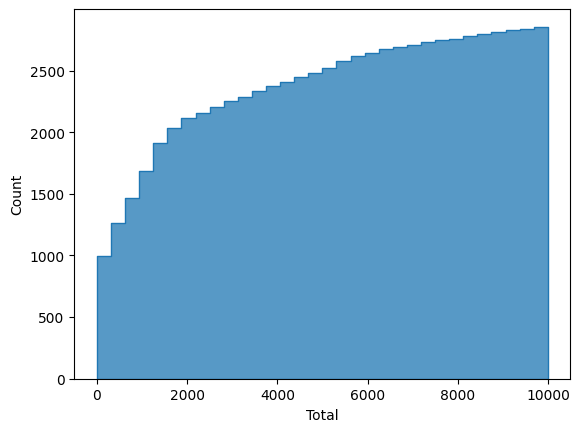

In [149]:
sns.histplot(x=df.Total,
             element="step",
             fill=True,
             cumulative=True) 

<Axes: xlabel='Total', ylabel='Count'>

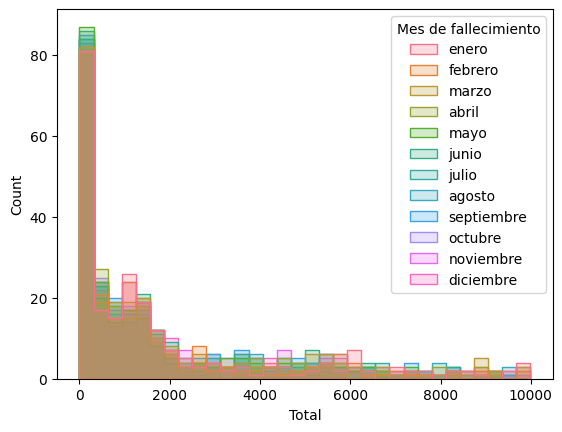

In [150]:
sns.histplot(x="Total",
             hue="Mes de fallecimiento",
             data=df,
             element="step",
             fill=True,
             cumulative=False) 

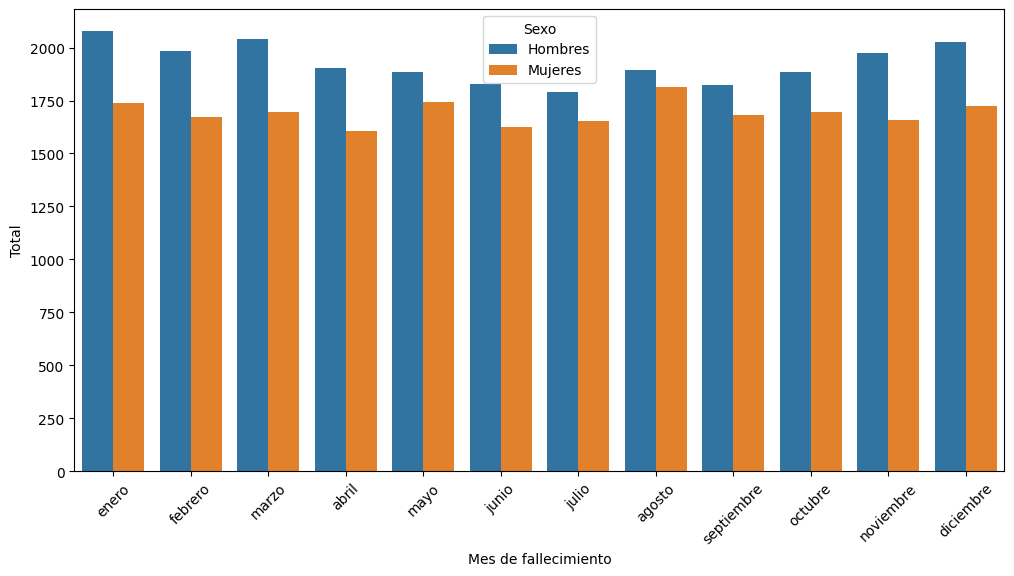

In [151]:
plt.figure(figsize=(12, 6))  # Ancho = 12, Alto = 6

sns.barplot(x="Mes de fallecimiento", y="Total", hue="Sexo", data=df, errorbar=None)

plt.xticks(rotation=45)
plt.show()

In [152]:
mes_con_mas_muertes = df.groupby("Mes de fallecimiento")["Total"].sum().sort_values(ascending=False)

<Axes: xlabel='Mes de fallecimiento'>

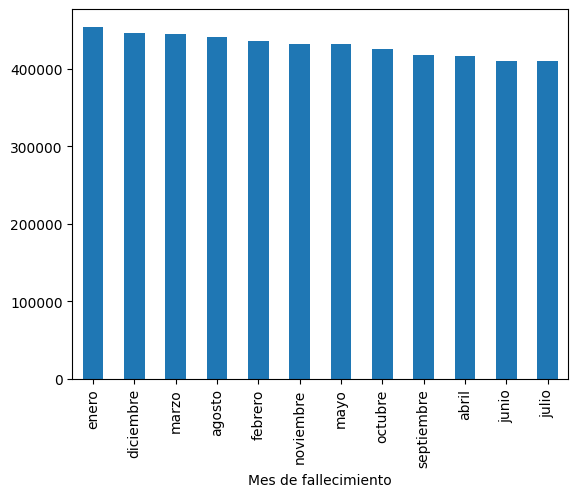

In [153]:
mes_con_mas_muertes.plot(kind="bar")

In [154]:
Primera_causa_muerte = df.groupby(["Causas (lista reducida)", "Sexo"])["Total"].sum().sort_values(ascending=False)

In [155]:
# Enmascarar las filas donde "Hombres" es mayor que 0
Primera_causa_muerte = Primera_causa_muerte.reset_index()



In [157]:
mujeres = Primera_causa_muerte[(Primera_causa_muerte.Sexo == "Mujeres") & (Primera_causa_muerte.Total > 100)]

In [158]:
hombres = Primera_causa_muerte[(Primera_causa_muerte.Sexo == "Hombres") & (Primera_causa_muerte.Total > 100)]

In [159]:
mujeres


,Causas (lista reducida),Sexo,Total
1,077-080 XIV.Enfermedades del sistema genitouri...,Mujeres,99310
2,051 Enfermedad de Alzheimer,Mujeres,95020
5,068-072 XI.Enfermedades del sistema digestivo,Mujeres,92748
7,"044-045 IV.Enfermedades endocrinas, nutriciona...",Mujeres,83650
9,072 Otras enfermedades del sistema digestivo,Mujeres,81020
...,...,...,...
212,100 Eventos de intención no determinada,Mujeres,350
215,102 Otras causas externas y sus efectos tardíos,Mujeres,250
216,088 Muerte súbita infantil,Mujeres,220
217,003 Enfermedad meningocócica,Mujeres,160


In [166]:
hombres.head(10)

,Causas (lista reducida),Sexo,Total
0,059 Enfermedades cerebrovasculares,Hombres,104810
3,090-102 XX.Causas externas de mortalidad,Hombres,94463
4,050-052 VI-VIII.Enfermedades del sistema nervi...,Hombres,93715
6,056 Otras enfermedades isquémicas del corazón,Hombres,92250
8,055 Infarto agudo de miocardio,Hombres,82210
10,068-072 XI.Enfermedades del sistema digestivo,Hombres,78950
12,067 Otras enfermedades del sistema respiratorio,Hombres,77962
13,064 Enfermedades crónicas de las vías respirat...,Hombres,77568
14,057 Insuficiencia cardíaca,Hombres,77210
15,001-008 I.Enfermedades infecciosas y parasitarias,Hombres,75210


In [162]:
mujeres.head(10)

,Causas (lista reducida),Sexo,Total
1,077-080 XIV.Enfermedades del sistema genitouri...,Mujeres,99310
2,051 Enfermedad de Alzheimer,Mujeres,95020
5,068-072 XI.Enfermedades del sistema digestivo,Mujeres,92748
7,"044-045 IV.Enfermedades endocrinas, nutriciona...",Mujeres,83650
9,072 Otras enfermedades del sistema digestivo,Mujeres,81020
11,054 Enfermedades hipertensivas,Mujeres,78398
17,001-008 I.Enfermedades infecciosas y parasitarias,Mujeres,74140
23,057 Insuficiencia cardíaca,Mujeres,68374
24,090-102 XX.Causas externas de mortalidad,Mujeres,65680
26,023 Tumor maligno de la mama,Mujeres,64290
